<a id='section22'></a>

# Basic Image Processing(3)

---

## 1.[픽셀그룹처리](#section1)


### 엣지검출
Edge는 영상의 밝기가 낮은 값에서 높은값으로, 또는 이와 반대로 변화하는 지점에 존재하는 부분을 가르킨다. Edge는 영상안에 있는 경계(Boundary)를 가리키는 것으로 Shape와 Direction을 탐지하는 등 여러 정보가 담겨있다. 


에지의 종류는 4가지로 아래와 같다.



<img src="./images/day3/edge.PNG" width = "700" height = "700">

루프에지는 급격하게 증가하다가 다시 급격하게 작아지는 에지이고, 라인에지는 급격하게 증가하고 유지되다가 다시 급감하는 에지이다. 스텝에지는 계단모양으로 급격하게 증가해서 다시 일정한 값을 유지하는 에지이고 램프에지는 일정한 값을 유지하다가 서서히 증가하다가 다시 유지되는 에지를 말한다.


에지를 찾는 방법은 밝기 값의 변화(기울기)를 이용해서 찾아간다.
가장 쉬운 예를 들어서 설명을 하면,

<img src="./images/day3/edge2.PNG" width = "700" height = "700">


$f'(x) = f(x+1)-f(x)$ 변화량을 1로 설정하게 되면 왼쪽 식과 같이 미분 값을 구할 수 있다. 즉 영상을 1픽셀값식 움직인 영상에서 원 영상을 빼게 된다. 이렇게 구한 기울기를 기준으로 기울기 값이 큰 값이 Edge부분에 해당한다. 


실제 영상에서는 차이가 나는 물체가 연속되는 것이 아니라, 일정한 정도의 차이가 나는 것이 연속되고 큰 차이가 한 번 있는 경우가 대부분이기 때문에 조금 더 큰 연산자가 필요하다. x값의 변화량을 2로 설정하는 미분식을 보면



$f'(x) = (f(x+1)-f(x))/2$ 식과 같이 되고 이것 역시 마찬가지로 값의 변화량(기울기)이 큰 것을 기준으로 0과 1로 나누면 Edge만 남게된다. 


다음으로는 이를 기반으로 만들어진 유명한 Filter들에 대해서 소개를 하면

---


### Roberts Filters


- Roberts Filter는 2차원 배열을 사용하기 때문에 가장 빠르다는 장점이 있지만, 가장 오래전에 만들어진 연산이고, 잡음에 약하기 때문에 잘 사용되ㅔ지는 않는 연산자이다. 필터는 아래와 같으며 필터를



<img src="./images/day3/roberts.PNG" width = "500" height = "500">

### Prewitt Filters



Prewitt Filter는 로버트 연산의 한계를 극복하기 위해 나온 것으로 마스크가 기존의 2x2에서 3x3으로 늘어났다. 수평,수직 엣지를 찾는데 매우 효과적인 결과를 얻을 수 있다. 


<img src="./images/day3/prewitt.PNG" width = "500" height = "500">

    
    
### Sobel Filter
Sobel Filter는 Prewitt의 단점을 극복하기 위해 나온 것이다. Prewitt Filter는 수평과 수직엣지는 잘 찾지만 대각선 엣지를 잘 찾지 못하는 것을 Sobel Filter는 잘 잡아낸다.



<img src="./images/day3/sobel.PNG" width = "500" height = "500">




<img src="./images/day3/비교.PNG" width = "500" height = "500">



<a id='section13'></a>

Original Image에 대해서 Robers와 아래의 Prewitt, Sobel Filter를 비교하면 아래의 필터들이 위의 Robers필터보다 Edge를 잘 detect를 하고있다. Sobel 과 Prewitt는... 큰 차이를 모르겠지만 Sobel Filter가 대각선의 엣지를 더 잘 발견한다.

[예제코드](#section4)





---

### Laplacian Filter
- 디지털영상에서 값들은 큰 차이가 나는 영상도 있지만 그렇지 않은 경우도 많다. 그런 경우에는 1차 미분가지고선 엣지를 검출해내는데 한계가 있다. 따라서 2차 미분으로 화장을 해서 생각해보면 2차 미분한식은 



<img src="./images/day3/2차미분.PNG" width = "700" height = "700">
    
    
    
- 위식처럼 미분이 가능하다. 이것을 아래 그림을 통해서 보여주면 1차 미분을 한지역에서는 서서히 감소하는 에지에 대해서 Edge를 발견하지 못하고 있지만 2차 미분에서는 뭔가 값의 변화가 있다. 2차미분은 위 그림에서 볼수 있듯이 Edge가 존재하는 지역에 시작점부터 끝점의 값을 더하면 영교차(Zero Crosing)이 나타나고 이 점을 엣지로 판단하면 엣지를 발견해낼 수 있다. 수식은 아래와 같다.
    
<img src="./images/day3/라플라시안미분.PNG" width = "700" height = "700">



- Laplacian Filter는 수평 수직 방향의 엣지뿐만 아니라 모든 방향에 대해서 엣지를 Detection한다는 장점이 있지만, Noise에 심하게 영향을 받는다는 단점이 있다. 
    

<img src="./images/day3/라플라시안noise.PNG" width = "700" height = "700">




- 위의 이미지를 보면 직사각형의 이미지에 Gaussian Noise를 넣은 이미지이다. 오른쪽 그림처럼 Laplacian Filter는 에지를 잘 잡아낼 수 있는 장점이 있지만 Noise에 심하게 영향을 받기 때문에 아무 엣지도 찾지 못하는 것을 볼 수 있다. 
    
    
### LOG(Laplacian Of Gaussian)


위의 Laplacian Filter의 단점을 없애고 장점을 극대화 하기 나온것이 바로 LOG(Laplacian Of Gaussian) Filter이다. LOG는 Gaussian Filter를 통해서 먼저 Smoothing을 진행한 뒤에 Laplacian Filter를 통해서 엣지를 Detect하는 것이다. 하지만 Gaussian을 하고나서 다시 Laplacian Filter를 적용시키면 연산자체가 2번 일어나게 되고 그에 따른 시간, 계산 효율성문제가 나타나기 때문에 수식전개를 통해서 두식을 합치면 결국 Gaussian Filter를 적용한 이미지에 대해서 $(x^2+y^2-2\sigma^2)/\sigma^4$을 곱한 꼴이 된다.

<img src="./images/day3/LOG식.PNG" width = "700" height = "700">



<img src="./images/day3/LOG.PNG" width = "700" height = "700">




<a id='section14'></a>

LOG Filter를 이용해서 위의 Noise가 낀 영상에 대해서 엣지를 Detect를 진행한 결과 위 사진처럼 스무딩 정도에 따라서 엣지를 잡아 내는 것을 볼 수 있다. 

[예제코드](#section5)

---


### Canny Edge Filter


- Canny Edge Detection은 기존의 Filter를 사용하던 방식과는 다르게 최적화 문제로 접근한다. Canny가 제시한 좋은 엣지 알고리즘이 갖춰야할 세 가지 기준이 있다. 
        1. 최소 오류율 : 거짓 긍정과 거짓 부정을 최소로 한다.(없는 엣지가 생성되거나 엣지를 못 찾는 경우를 최소로 유지한다)
        2. 위치 정확도 : 검출된 엣지는 실제 엣지의 위치와 가급적 가까워야 한다.
        3. 에지의 두께 : 실제 엣지에 해당하는 곳에는 한 두께의 에지만 생성해야한다.
        
        
        
- 알고리즘 순서
        1. Gaussian Smoothing 을 적용하고 Sobel Filter를 정용하여 에지강도 맵S와 에지방향D를 얻는다. 
        2. 비최대 억제를 통해 자신의 이웃보다 크지 않은 화소를 억제한다.(억제란 에지가 아닌 것으로 결정)
        3. 이력임계값 : 위의 비최대 억제 과정에서 거짓 긍정도 많이 포함되기 때문에 임계값을 설정해 놓고 엣지를 제거(거짓 긍정: 실제로는 엣지가 아닌데 어떤 이유에 의해서 엣지로 판정된것)

<img src="./images/day3/canny.PNG" width = "700" height = "700">



[예제코드](#section6)


---



<a id='section15'></a>

### Color Edge Detection


- Color Edge를 Detection할 수 있는 가장 쉬운 방법은 Color를 명암으로 변환 후 앞의 Canny알고리즘을 적용하는 것이다. RGB 영상에서 Color Edge를 검출하기 쉬운 방법은 각각의 채널에서 독립적으로 Edge를 검출한 뒤 3개의 영상을 합친다. 



<img src="./images/day3/color.PNG" width = "700" height = "700">




[예제코드](#section7)


---




<a id='section16'></a>

### Hough Transformation(허프변환)
- 허프변환은 이미지에서 모양을 찾는 가장 유명한 방법이다.이 방법을 이용하면 이미지의 형태를 찾거나, 누락되거나 깨진 영역을 복원할 수 있다. 



- 기본적으로 허프변환의 직선의 방정식을 이용하여 하나의 점을 지나는 무수한 직선의 방정식을 구한다. 식은 $y = ax + b$로 표현할 수 있다. 이것을 삼각함수를 이용하여 변형하면 $ r = xcos\theta+ysin\theta$ 으로 표현할 수 있다.
    
    
<img src="./images/day3/허프1.PNG" width = "700" height = "700">
    
    
각 점(x,y)에 대해 삼각함수를 이용하여 $\theta$값을 1~180까지 변화하면서 원점에서$(x,y)$까지의 거리r을 구한다. 그러면 ($\theta$,r)로 ㅅ구성된 180개의 2차원 배열울 구할 수 있다.


<img src="./images/day3/허프2.PNG" width = "700" height = "700">



이렇게 해서 구한 2차원 배열을 다시 그래프로 표현하면 위와 같이 사인파 그래프로 표현이 된다. 이때 아래의 3개의 방정식이 만나는 점이 바로 직선일 확률이 높은 점이다.

<img src="./images/day3/허프3.PNG" width = "700" height = "700">
<img src="./images/day3/허프4.PNG" width = "700" height = "700">




[예제코드](#section8)

---



<a id='section17'></a>

### RANSAC(RANdom Sample Consensus)



RANSAC은 우리가 원하는 포물선이나 직선의 방정식을 추정할때 사용하는 알고리즘으로 Outlier에 Robust한 알고리즘이다.


<img src="./images/day3/ransac.PNG" width = "700" height = "700">


우리가 구하고 싶은 포물선이 위와 같을 때 구하는것은 어렵지 않다. 하지만 실제 데이터세계에서는 위와같이 깔끔한 경우는 없고 오차가 있거나 아래 그림과 같이 Outlier가 있기 때문에 추정하는데 어려움이 있다. 이런 경우에 RANSAC을 이용해서 구하면 쉽게 구할 수 있다.


<img src="./images/day3/ransac2.PNG" width = "700" height = "700">
RANSAC은 무작위로 Sample data를 뽑아서 뽑은 데이터들을 만족하는 모델을 구한다. 구한 모델에서 inlier에 포함되어있는 개수를 세고 새로운 모델을 구한다. 위의 과정을 반복하면서 inlier가 가장 최대가 되는 모델을 구하는 방식이 RANSAC의 방식이다. 

위 알고리즘을 이용하면 outlier가 많아도 우리가 원하는 데이터에 Fitting시키는 것이 가능하다. 


<img src="./images/day3/ransac3.PNG" width = "700" height = "700">


<img src="./images/day3/ransac4.PNG" width = "700" height = "700">


[예제코드](#section9)


---




<a id='section18'></a>

## 2.[보간법](#section2)
보간법이란 기존에 공부했던 영상에 회전,확대,축소등의 기하학적 변환을 가하게될 경우 중간중간에 빈공간이 발생하고, 영상의 품질이 안좋아지게 되는데 그럴 경우에 영상의 품질을 높이는 방법이다.
보간법은 새로운 점을 만들기 위해 수 많은 점들을 평균화 시키고 샘플점들을 직선으로 연결하지 않고 곡선으로 연결함으로써 본래 신호 파형에 대한 변형을 최소화 시켜준다.


---

### 최근접 이웃 보간법(Nearest Neighbor Interpolation)
최근접 이웃 보간법은 원하는 픽셀의 위치와 가까운 픽셀 값을 사용하는 법을 말한다. 즉 출력 좌표가 정수가 아닌 경우 입력영상의 가장 가까운 정수 좌표를 선택하여 출력 좌표에 매핑시키는 방법이다.


<img src="./images/day3/inter1.PNG" width = "700" height = "700">


[예제코드](section10)


---


<a id='section19'></a>

### 쌍일차 보간법(Bilinear Interpolation)
쌍일차 보간법은 대상 픽셀이 위치할 곳의 주변의 네 개의 픽셀들의 밝기 평균값을 취하는 것이다. 평균값 계싼의 가중치는 원하는 픽셀의 위치에 이웃하는 픽셀들이 얼마나 가까운가에 비례한다. 
<img src="./images/day3/bilinear.PNG" width = "700" height = "700">



예를들어 위의 이미지를 보면 가운데 P의 점의 값을 구하기 위해 (A,B)의 중앙 M , (B,C)의 V, (C,D)의 N,(A,D)의 U를 구하고 이 점들을 이용하여 P점의 값을 구하는 방식이다. 


<img src="./images/day3/inter2.PNG" width = "700" height = "700">


[예제코드](section11)


---



<a id='section20'></a>

### 고차보간법 (High Order Interpolation)
고차 보간법은 역방향 사상된 좌표$(x,y)$ 주변의 4*4 이웃화소를 사용한다. 보간을 위한 함수를 하나 두고 멀어질수록 반비례하는 가중치를 계산하여 넣어주게 된다.


<img src="./images/day3/high수식.PNG" width = "700" height = "700">

이 보간법의 특징은 a값에 따라 다른 결과를 낸다. 대표적인 값으로 1,-0.5,-0.75,-1이 있고, 보통 -1이 시각적으로 가장 좋은 결과를 제공한다

그리고 음수 가중치가 가능하기 때문에 최대값보다 큰 화소값을 생성할 수 있고, 미분효과가 있어서 샤프닝 효과가 일어난다.



<img src="./images/day3/high.PNG" width = "700" height = "700">



[예제코드](#section12)

---


<a id='section21'></a>

### 스플라인 보간법(Spline Interpolation)
스플라인 보간법은 3가지 기준을 가지고 보간법을 진행한다

<img src="./images/day3/sp1.PNG" width = "700" height = "700">

1. 곡선이 이어져있다.                              ->   곡선은 연속함수를 의미한다.
2. 변화하는 것도 부드럽게 잘 이어져야 한다.        ->   곡선의 변화는 미분을 의미하는데 부드럽게 잘이어어져야하니 미분값이 연속이어야 한다.
3. 곡선이 변화하는 것도 부드러우면서 더 자연스럽다.->   곡선의 변화는 곡률을 의미하는데 곡률은 2차미분에 해당한다. 따라서 2차 미분도 연속이어야 한다.


<img src="./images/day3/sp2.PNG" width = "700" height = "700">
<img src="./images/day3/sp3.PNG" width = "700" height = "700">


<img src="./images/day3/sp4.PNG" width = "700" height = "700">
<img src="./images/day3/sp5.PNG" width = "700" height = "700">


[예제코드](#section13)

# 이용 packages

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from skimage import data, img_as_float
from skimage.feature import blob_log
from skimage.filters import sobel, prewitt,roberts, laplace, inverse, median, prewitt, threshold_otsu
from skimage.morphology import convex_hull_image
from skimage.io import imread
from scipy import ndimage as ndi
from skimage.transform import resize,rescale
from operator import xor
from scipy.ndimage.filters import gaussian_laplace

# 픽셀그룹처리

<a id='section1'></a>

In [14]:
image = data.camera()

<a id='section4'></a>

# Loberts Filter

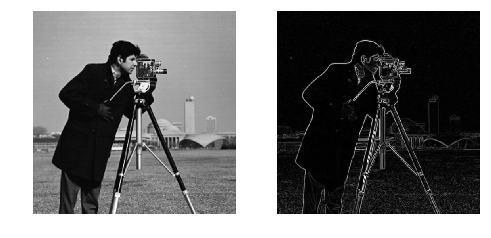

In [20]:
fig , ax = plt.subplots(1, 2 , figsize = (8,8))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(roberts(image), cmap = plt.cm.gray)

for a in ax:
    a.axis('off')

# Prewitt Filter

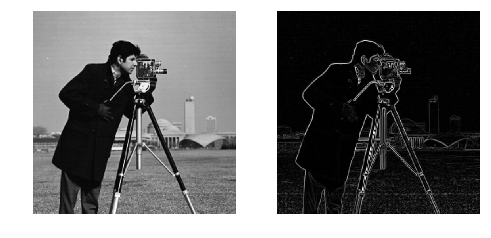

In [19]:
fig , ax = plt.subplots(1, 2 , figsize = (8,8))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(prewitt(image), cmap = plt.cm.gray)

for a in ax:
    a.axis('off')

# Sobel Filter 

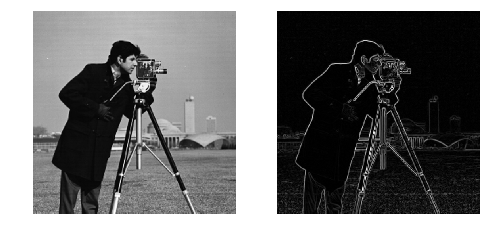

In [18]:
fig , ax = plt.subplots(1, 2 , figsize = (8,8))

ax[0].imshow(image, cmap = plt.cm.gray)
ax[1].imshow(sobel(image), cmap = plt.cm.gray)

for a in ax:
    a.axis('off')

# 3개의 필터 비교

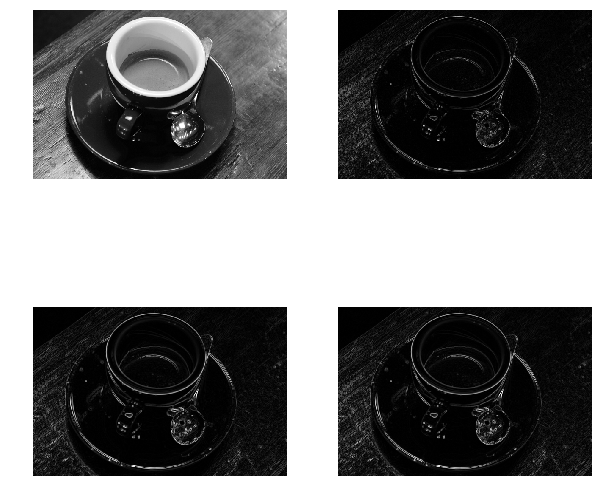

In [51]:
image = data.coffee()
image = image[:,:,1]
fig, ax = plt.subplots(2,2,figsize = (10,10))

ax[0,0].imshow(image, cmap = plt.cm.gray)
ax[0,0].axis('off')
ax[0,1].imshow(roberts(image),cmap = plt.cm.gray)
ax[0,1].axis('off')
ax[1,0].imshow(prewitt(image),cmap = plt.cm.gray)
ax[1,0].axis('off')
ax[1,1].imshow(sobel(image), cmap = plt.cm.gray)
ax[1,1].axis('off')

plt.show()


[돌아가기](#section13)

# Laplacian Filter

<a id='section5'></a>

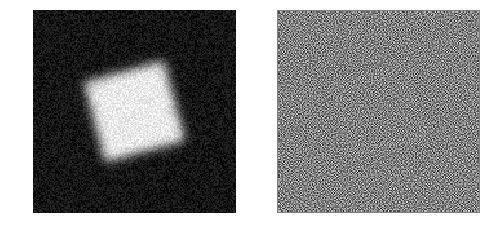

In [54]:
im = np.zeros((128,128))
im[32:-32,32:-32] = 1

im = ndi.rotate(im, 15, mode = 'constant')
im = ndi.gaussian_filter(im,4)
im += 0.2 *np.random.random(im.shape)

fig, ax = plt.subplots(1,2,figsize = (8,8))

ax[0].imshow(im, cmap = plt.cm.gray)
ax[1].imshow(laplace(im), cmap = plt.cm.gray)


for a in ax:
    a.axis('off')

### LOG(Laplacian Of Gaussian)

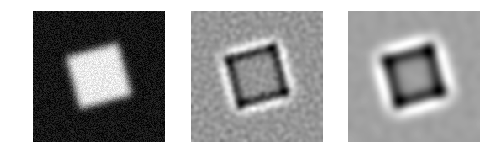

In [60]:
im = np.zeros((128,128))
im[32:-32,32:-32] = 1

im = ndi.rotate(im, 15, mode = 'constant')
im = ndi.gaussian_filter(im,4)
im += 0.2 *np.random.random(im.shape)

fig, ax = plt.subplots(1,3,figsize = (8,8))

ax[0].imshow(im, cmap = plt.cm.gray)
ax[1].imshow(gaussian_laplace(im,3), cmap = plt.cm.gray)
ax[2].imshow(gaussian_laplace(im,6), cmap = plt.cm.gray)

for a in ax:
    a.axis('off')

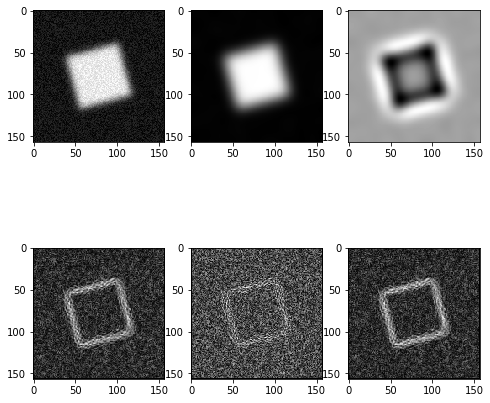

In [25]:
im = np.zeros((128,128))
im[32:-32,32:-32] = 1

im = ndi.rotate(im, 15, mode = 'constant')
im = ndi.gaussian_filter(im,4)
im += 0.2 *np.random.random(im.shape)

fig, ax = plt.subplots(2,3,figsize = (8,8))

ax[0,0].imshow(im, cmap = plt.cm.gray)
ax[0,1].imshow(ndi.gaussian_filter(im,6),cmap = plt.cm.gray)
ax[0,2].imshow(gaussian_laplace(im,8),cmap = plt.cm.gray)
ax[1,0].imshow(sobel(im),cmap = plt.cm.gray)
ax[1,1].imshow(roberts(im), cmap = plt.cm.gray)
ax[1,2].imshow(prewitt(im), cmap = plt.cm.gray)


[돌아가기](#section14)

# Canny Edge Detector

<a id='section6'></a>

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


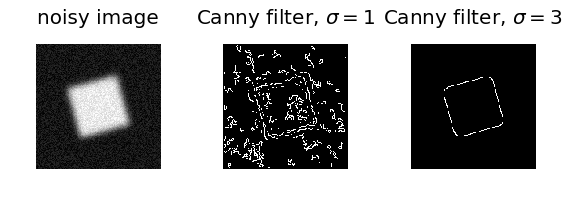

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

[돌아가기](#section15)

# Color Edge Detection

<a id='section7'></a>

In [315]:
image = data.astronaut()

In [320]:
# 각각의 RGB각각의 color Edge를 구한다. 
a1 = sobel(image[:,:,0])
a2 = sobel(image[:,:,1])
a3 = sobel(image[:,:,2])

In [321]:
aa1 = a1.reshape(512,512,1)
aa2 = a2.reshape(512,512,1)
aa3 = a3.reshape(512,512,1)

In [322]:
aaa = np.concatenate((aa1,aa2,aa3), axis = 2)

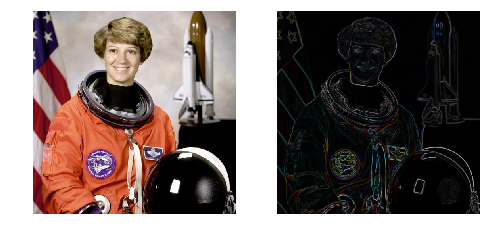

In [323]:
fig, ax = plt.subplots(1,2, figsize = (8,8))

ax[0].imshow(image)
ax[1].imshow(aaa)

for a in ax:
    a.axis('off')

[돌아가기](#section16)

# Hough Transformation and Line Detection

<a id='section8'></a>

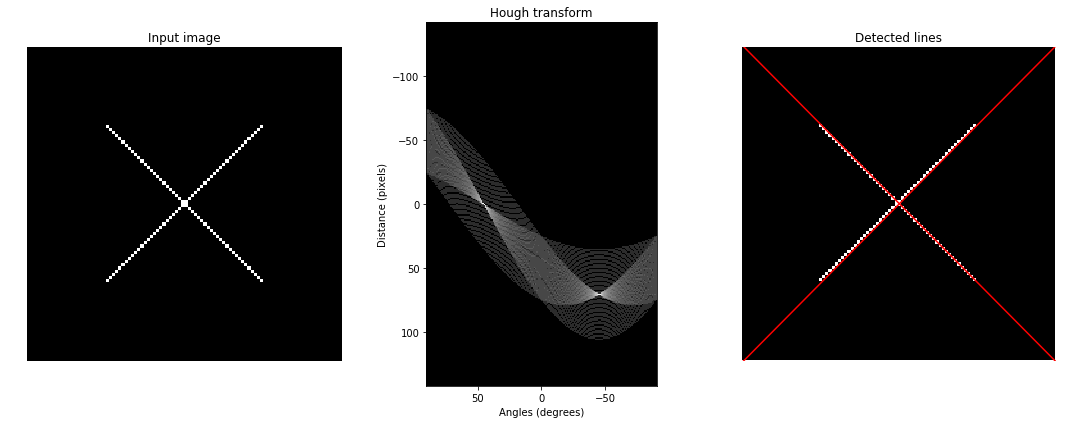

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


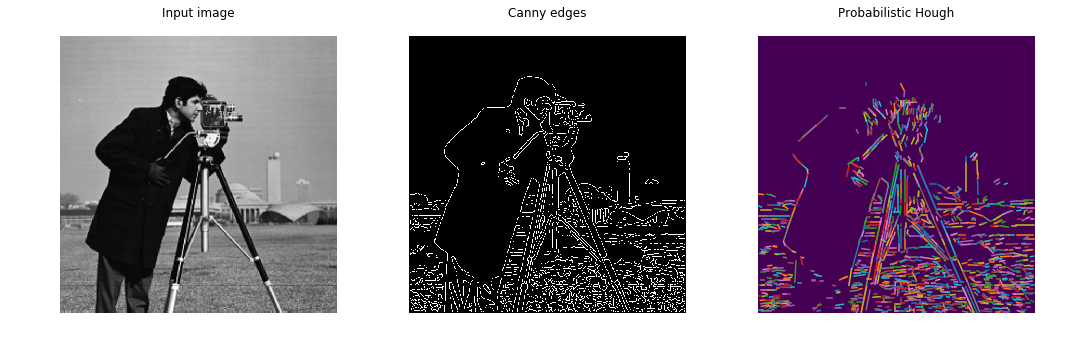

In [63]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

[돌아가기](#section17)

# Line Detection RANSAC

<a id='section9'></a>

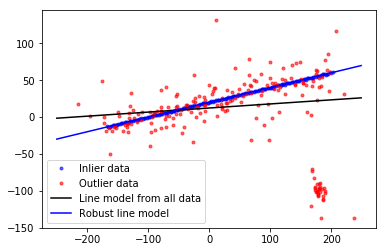

In [64]:
import numpy as np
from matplotlib import pyplot as plt

from skimage.measure import LineModelND, ransac


np.random.seed(seed=1)

# generate coordinates of line
x = np.arange(-200, 200)
y = 0.2 * x + 20
data = np.column_stack([x, y])

# add faulty data
faulty = np.array(30 * [(180., -100)])
faulty += 5 * np.random.normal(size=faulty.shape)
data[:faulty.shape[0]] = faulty

# add gaussian noise to coordinates
noise = np.random.normal(size=data.shape)
data += 0.5 * noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]

# fit line using all data
model = LineModelND()
model.estimate(data)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
        label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
        label='Outlier data')
ax.plot(line_x, line_y, '-k', label='Line model from all data')
ax.plot(line_x, line_y_robust, '-b', label='Robust line model')
ax.legend(loc='lower left')
plt.show()

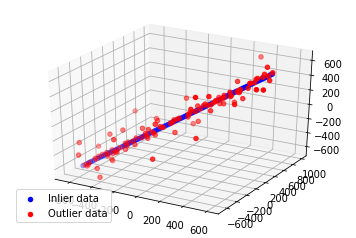

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import LineModelND, ransac

np.random.seed(seed=1)

# generate coordinates of line
point = np.array([0, 0, 0], dtype='float')
direction = np.array([1, 1, 1], dtype='float') / np.sqrt(3)
xyz = point + 10 * np.arange(-100, 100)[..., np.newaxis] * direction

# add gaussian noise to coordinates
noise = np.random.normal(size=xyz.shape)
xyz += 0.5 * noise
xyz[::2] += 20 * noise[::2]
xyz[::4] += 100 * noise[::4]

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(xyz, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[inliers][:, 0], xyz[inliers][:, 1], xyz[inliers][:, 2], c='b',
           marker='o', label='Inlier data')
ax.scatter(xyz[outliers][:, 0], xyz[outliers][:, 1], xyz[outliers][:, 2], c='r',
           marker='o', label='Outlier data')
ax.legend(loc='lower left')
plt.show()

[돌아가기](#section18)

<a id='section2'></a>

# 재표본추출과 보간법

In [294]:
image = data.chelsea()
image2 = resize(image, (50,50))

# Nearest Interpolation

<a id='section10'></a>

In [308]:
image = data.chelsea()
image2 = resize(image, (50,50))

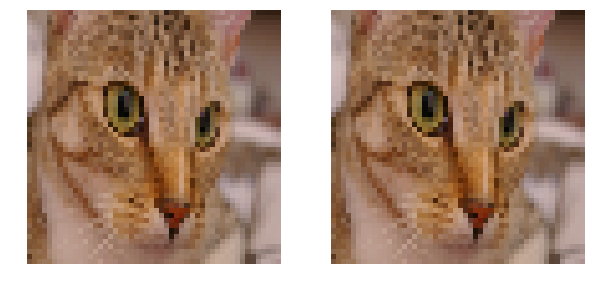

In [310]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
 
ax[0].imshow(image2)
ax[1].imshow(image2, Interpolation = "nearest")

for a in ax:
    a.axis('off')

[돌아가기](#section19)

# Bilinear Interpolation

<a id='section11'></a>

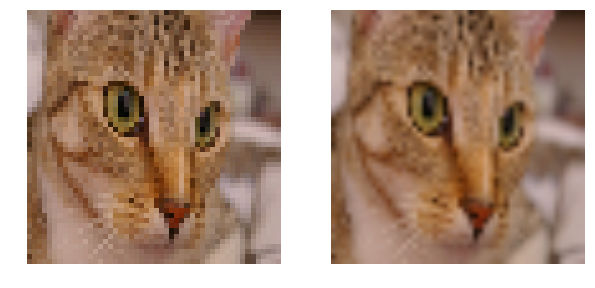

In [311]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image2)
ax[1].imshow(image2, Interpolation = "bilinear")

for a in ax:
    a.axis('off')

[돌아가기](#section20)

## Higher Order Interpolation

<a id='section12'></a>

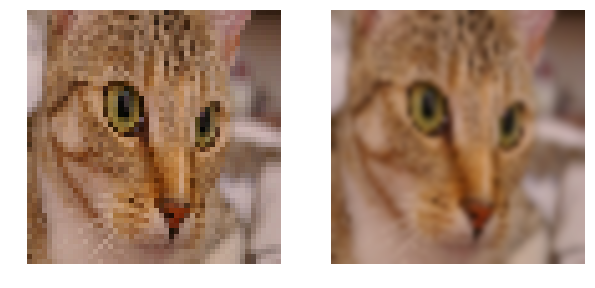

In [313]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image2)
ax[1].imshow(image2, Interpolation = "bicubic")

for a in ax:
    a.axis('off')

[돌아가기](#section21)

# Spline Interpolation

<a id='section13'></a>

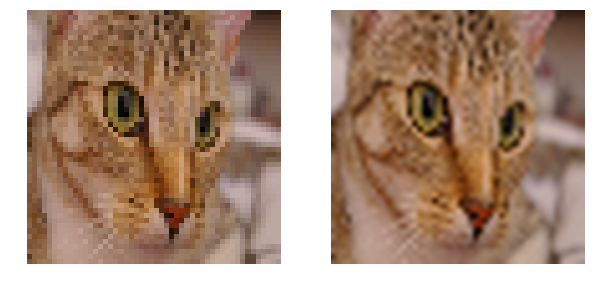

In [312]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(image2)
ax[1].imshow(image2, Interpolation = "spline36")

for a in ax:
    a.axis('off')

[처음으로 돌아가기](#section22)